In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train-chennai-sale.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [3]:
df.shape

(7109, 22)

In [4]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [5]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

# PRT_ID

Drop 'PRT_ID' column because it is not required as a feature for chennai home price prediction.

In [6]:
df.drop('PRT_ID',axis=1,inplace=True)

In [7]:
df.head(5)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


# AREA

In [8]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [9]:
df.AREA.shape

(7109,)

In [10]:
df.AREA.isnull().values.any()

False

In [11]:
df['AREA'].dtypes

dtype('O')

In [12]:
df['AREA']=df['AREA'].replace('Adyr','Adyar')
df['AREA']=df['AREA'].replace('Ana Nagar','Anna Nagar')
df['AREA']=df['AREA'].replace('Ann Nagar','Anna Nagar')
df['AREA']=df['AREA'].replace('Chrompt','Chrompet')
df['AREA']=df['AREA'].replace('Chrmpet','Chrompet')
df['AREA']=df['AREA'].replace('Chormpet','Chrompet')
df['AREA']=df['AREA'].replace('Velchery','Velachery')
df['AREA']=df['AREA'].replace('KK Nagar', 'KKNagar')
df['AREA']=df['AREA'].replace('T Nagar','TNagar')
df['AREA']=df['AREA'].replace('Karapakkam','Karapakam')

In [13]:
df['AREA'].unique()

array(['Karapakam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KKNagar', 'TNagar'], dtype=object)

AREA column was cleaned from spelling mistakes

# INT_SQFT

In [14]:
df.INT_SQFT.isnull().values.any()

False

In [15]:
df['INT_SQFT'].dtypes

dtype('int64')

In [16]:
df['INT_SQFT'].describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

To detect outliers in 'INT_SQFT'  using  [Z-score] (method 1)

     formula= (x-mean)/standard deviation

In [17]:
data=df['INT_SQFT']
outliers=[]
def detect_outliers(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if z_score > threshold:
            outliers.append(z_score)
    return outliers


In [18]:
outlierdetection=detect_outliers(data)
outlierdetection

[]

There are no outliers in 'INT_SQFT'

# DATE_SALE

In [19]:
df.DATE_SALE.isnull().values.any()

False

In [20]:
df['DATE_SALE'].dtypes

dtype('O')

In [21]:
df['DATE_SALE'][0]

'04-05-2011'

In [22]:
#change DATE_SALE column format [ str format to date_time format]
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'], infer_datetime_format=True)

In [23]:
df['DATE_SALE'][0]

Timestamp('2011-04-05 00:00:00')

In [24]:
df['DATE_SALE'].dtypes

dtype('<M8[ns]')

DATE_SALE column was cast to timestamp from str

# DIST_MAINROAD

In [25]:
df.DIST_MAINROAD.isnull().values.any()

False

In [26]:
df['DIST_MAINROAD'].dtypes

dtype('int64')

In [27]:
df['DIST_MAINROAD'].describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

In [28]:
data1=df['DIST_MAINROAD']
outliers=[]
def detect_outliers(data1):
    threshold=3
    mean=np.mean(data1)
    std=np.std(data1)
    
    for i in data1:
        z_score=(i-mean)/std
        if z_score > threshold:
            outliers.append(z_score)
    return outliers

In [29]:
outlierdetection=detect_outliers(data1)
outlierdetection

[]

There are no outliers in 'DIST_MAINROAD'

# N_BEDROOM

In [30]:
df.N_BEDROOM .isnull().values.any()

True

In [31]:
df['N_BEDROOM'].dtypes

dtype('float64')

In [32]:
df[df['N_BEDROOM'].isnull()]

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
4060,Anna Nagar,1556,2013-01-16,181,NaN,1.0,4,Partiall,No,23-01-1986,...,NoSewr,No Access,RM,4.8,2.7,2.0,3.155,313136,107978,10797790


In [33]:
df['N_BEDROOM']=df['N_BEDROOM'].fillna(1)

In [34]:
df['N_BEDROOM'][4060]

1.0

In [35]:
df['N_BEDROOM']=df['N_BEDROOM'].astype(int)
df['N_BEDROOM'].dtypes

dtype('int32')

In [36]:
df['N_BEDROOM'].describe()

count    7109.000000
mean        1.636939
std         0.802881
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: N_BEDROOM, dtype: float64

IQR=75%-25%,
q1=25%,
q3=75%

In [37]:
print('lowervalue',1-(1.5*1))
print('uppervalue',2+(1.5*1))

lowervalue -0.5
uppervalue 3.5


maximum value is 3.5<4 & minimum value is -0.5<1 so there are no outliers in  'N_BEDROOM'

# N_BATHROOM

In [38]:
df.N_BATHROOM.isnull().values.any()

True

In [39]:
df['N_BATHROOM'].dtypes

dtype('float64')

In [40]:
df[df['N_BATHROOM'].isnull()]

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
70,Anna Nagar,1589,2010-03-22,39,1,NaN,4,Partial,No,02-04-1966,...,AllPub,Gravel,RL,2.1,2.5,4.5,3.16,451857,85486,12212350
5087,Chrompet,1016,2012-02-08,105,1,NaN,3,AbNormal,Yes,10-08-1980,...,NoSewr,Gravel,RM,3.2,4.2,2.0,3.24,330086,106479,10647920
6134,Chrompet,916,2012-02-08,173,1,NaN,3,Normal Sale,Yes,12-08-1974,...,ELO,Paved,RL,3.4,3.5,3.0,NaN,265423,44237,8847420
6371,Chrompet,1035,2012-06-11,90,1,NaN,3,Partial,No,14-11-1981,...,NoSeWa,No Access,RM,2.3,3.5,3.2,3.05,223403,24823,8274200
6535,Anna Nagar,1864,2007-05-03,184,2,NaN,5,Family,Yes,07-03-1997,...,NoSewr,Paved,RM,3.3,3.7,4.7,3.96,575606,124455,15556920


In [41]:
df['N_BATHROOM']=df['N_BATHROOM'].fillna(df.groupby('QS_BATHROOM')['N_BATHROOM'].transform('median'))

In [42]:
df['N_BATHROOM'][70]

1.0

In [43]:
df['N_BATHROOM']=df['N_BATHROOM'].astype(int)
df['N_BATHROOM'].dtypes

dtype('int32')

In [44]:
df['N_BATHROOM'].describe()

count    7109.000000
mean        1.213110
std         0.409534
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: N_BATHROOM, dtype: float64

IQR=75%-25%,
q1=25%,
q3=75%

In [45]:
print('lowervalue',1-(1.5*0))
print('uppervalue',1+(1.5*0))

lowervalue 1.0
uppervalue 1.0


maximum value is 1<2 & minimum value is 1<=1 so there are no outliers in 'N_BATHROOM'

# N_ROOM

In [46]:
df.N_ROOM .isnull().values.any()

False

In [47]:
df['N_ROOM'].dtypes

dtype('int64')

In [48]:
df['N_ROOM'].describe()

count    7109.000000
mean        3.688704
std         1.019099
min         2.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: N_ROOM, dtype: float64

IQR=75%-25%, q1=25%, q3=75%

In [49]:
print('lowervalue',3-(1.5*1))
print('uppervalue',4+(1.5*1))

lowervalue 1.5
uppervalue 5.5


maximum value is 5.5<6 & minimum value is 1.5<2 so there are no outliers in 'N_BATHROOM'

# SALE_COND

In [50]:
df.SALE_COND.isnull().values.any()

False

In [51]:
df['SALE_COND'].dtypes

dtype('O')

In [52]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [53]:
df['SALE_COND']=df['SALE_COND'].replace(['Partiall','PartiaLl'],'Partial')

In [54]:
df['SALE_COND'] = df['SALE_COND'].str.replace(" ","")

In [55]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'NormalSale'],
      dtype=object)

SALE_COND column was cleaned from spelling mistakes

# PARK_FACIL

In [56]:
df.PARK_FACIL.isnull().values.any()

False

In [57]:
df['PARK_FACIL'].dtypes

dtype('O')

In [58]:
df['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [59]:
df.PARK_FACIL=df.PARK_FACIL.replace('Noo','No')

In [60]:
df['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

 PARK_FACIL column was cleaned from spelling mistakes

Here we can do label encoding ,because it is binary categorical variable(yes,no).

In [61]:
df['PARK_FACIL']=df['PARK_FACIL'].astype('category')

In [62]:
df['PARK_FACIL']=df['PARK_FACIL'].cat.codes

In [63]:
df['PARK_FACIL'].unique()

array([1, 0], dtype=int8)

# DATE_BUILD

In [64]:
df.DATE_BUILD.isnull().values.any()

False

In [65]:
df['DATE_BUILD'].dtypes

dtype('O')

In [66]:
df['DATE_BUILD'][0]

'15-05-1967'

In [67]:
#change DATE_BUILD column format [ str format to date_time format]
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'], infer_datetime_format=True)

In [68]:
df['DATE_BUILD'][0]

Timestamp('1967-05-15 00:00:00')

In [69]:
df['DATE_BUILD'].dtype

dtype('<M8[ns]')

DATE_BUILD column was casttype to timestamp from str

# BUILDTYPE

In [70]:
df.BUILDTYPE.isnull().values.any()

False

In [71]:
df['BUILDTYPE'].dtypes

dtype('O')

In [72]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [73]:
df['BUILDTYPE']=df['BUILDTYPE'].replace('Others','Other')
df['BUILDTYPE']=df['BUILDTYPE'].replace('Comercial','Commercial')

In [74]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Other', 'House'], dtype=object)

BUILDTYPE column was cleaned from spelling mistakes

# UTILITY_AVAIL

In [75]:
df.UTILITY_AVAIL.isnull().values.any()

False

In [76]:
df['UTILITY_AVAIL'].dtypes

dtype('O')

In [77]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [78]:
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].str.replace(" ","")

In [79]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSeWa'], dtype=object)

UTILITY_AVAIL column was cleaned from spelling mistakes

# STREET

In [80]:
df.STREET.isnull().values.any()

False

In [81]:
df['STREET'].dtypes

dtype('O')

In [82]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [83]:
df['STREET']=df['STREET'].str.replace(' ','')
df['STREET']=df['STREET'].replace('Pavd','Paved')

In [84]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'NoAccess'], dtype=object)

STREET column was cleaned from spelling mistakes

# MZZONE

In [85]:
df.MZZONE.isnull().values.any()

False

In [86]:
df['MZZONE'].dtypes

dtype('O')

In [87]:
df.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

# masked data

# QS_ROOMS

In [88]:
df.QS_ROOMS.isnull().values.any()

False

In [89]:
df['QS_ROOMS'].dtypes

dtype('float64')

In [90]:
df['QS_ROOMS']=df['QS_ROOMS'].astype(int)
df['QS_ROOMS'].dtypes

dtype('int32')

In [91]:
df['QS_ROOMS'].describe()

count    7109.000000
mean        3.075538
std         0.872937
min         2.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: QS_ROOMS, dtype: float64

In [92]:
data=df['QS_ROOMS']
outliers=[]
def detect_outliers(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if z_score > threshold:
            outliers.append(z_score)
    return outliers


In [93]:
outlierdetection=detect_outliers(data)
outlierdetection

[]

There are no outliers in 'QS_ROOMS'

# QS_BATHROOM

In [94]:
df.QS_BATHROOM.isnull().values.any()

False

In [95]:
df['QS_BATHROOM'].dtypes

dtype('float64')

In [96]:
df['QS_BATHROOM']=df['QS_BATHROOM'].astype(int)
df['QS_BATHROOM'].dtypes

dtype('int32')

In [97]:
df['QS_BATHROOM'].describe()

count    7109.000000
mean        3.069349
std         0.876024
min         2.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: QS_BATHROOM, dtype: float64

In [98]:
data=df['QS_BATHROOM']
outliers=[]
def detect_outliers(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if z_score > threshold:
            outliers.append(z_score)
    return outliers

In [99]:
outlierdetection=detect_outliers(data)
outlierdetection

[]

There are no outliers in 'QS_BATHROOM'

# QS_BEDROOM

In [100]:
df.QS_BEDROOM.isnull().values.any()

False

In [101]:
df['QS_BEDROOM'].dtypes

dtype('float64')

In [102]:
df['QS_BEDROOM']=df['QS_BEDROOM'].astype(int)
df['QS_BEDROOM'].dtypes

dtype('int32')

In [103]:
df['QS_BEDROOM'].describe()

count    7109.000000
mean        3.056126
std         0.871499
min         2.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: QS_BEDROOM, dtype: float64

In [104]:
data=df['QS_BEDROOM']
outliers=[]
def detect_outliers(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if z_score > threshold:
            outliers.append(z_score)
    return outliers

In [105]:
outlierdetection=detect_outliers(data)
outlierdetection

[]

There are no outliers in 'QS_BEDROOM'

# QS_OVERALL

In [106]:
df.QS_OVERALL.isnull().values.any()

True

In [107]:
df.QS_OVERALL.isnull().sum()

48

In [108]:
df['QS_OVERALL'].dtypes

dtype('float64')

In [109]:
df[df['QS_OVERALL'].isnull()]

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
15,Velachery,1868,2009-12-09,148,3,2,5,Family,0,2000-09-14,...,NoSewr,Gravel,RH,3,3,3,NaN,597135,188569,15714080
46,TNagar,1882,2006-11-18,189,2,1,5,AbNormal,1,1985-11-23,...,ELO,Gravel,RM,3,4,4,NaN,433393,272877,16051580
86,Chrompet,1085,2014-01-19,149,1,1,3,AbNormal,1,2008-01-21,...,NoSewr,Gravel,RL,2,3,4,NaN,387815,100545,14363500
111,Adyar,1034,2009-05-30,73,1,1,3,AdjLand,1,1993-06-03,...,ELO,Gravel,C,3,3,3,NaN,277702,46284,9256740
134,TNagar,1942,2014-12-20,10,2,1,5,Family,0,1977-12-29,...,NoSeWa,Gravel,RH,4,3,2,NaN,320599,61654,12330740
143,Karapakam,1430,2009-02-10,17,2,2,4,AbNormal,1,1999-10-05,...,NoSewr,NoAccess,A,4,3,3,NaN,238887,106172,6635750
161,Velachery,1824,2009-03-04,187,3,2,5,NormalSale,0,1976-04-11,...,NoSewr,Paved,I,3,2,4,NaN,273570,76942,8549060
186,Adyar,738,2007-02-09,69,1,1,2,Partial,0,1989-09-06,...,NoSewr,NoAccess,I,2,4,5,NaN,324194,8313,8312670
208,Karapakam,1578,2011-04-18,153,2,2,4,NormalSale,1,1998-04-21,...,AllPub,Gravel,I,4,4,3,NaN,295508,238313,9532500
248,Velachery,1776,2010-09-06,120,2,1,4,NormalSale,1,1989-06-14,...,NoSeWa,Paved,RH,4,2,3,NaN,319653,89903,9989170


In [110]:
df['QS_OVERALL']=df['QS_OVERALL'].fillna(df.groupby('SALE_COND')['QS_OVERALL'].transform('median'))

In [111]:
df['QS_OVERALL'][15]

3.51

In [112]:
df['QS_OVERALL'].isnull().sum()

0

In [113]:
df['QS_OVERALL']=df['QS_OVERALL'].astype(int)
df['QS_OVERALL'].dtypes

dtype('int32')

In [114]:
df['QS_OVERALL'].describe()

count    7109.000000
mean        3.004501
std         0.603154
min         2.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: QS_OVERALL, dtype: float64

In [115]:
data=df['QS_OVERALL']
outliers=[]
def detect_outliers(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if z_score > threshold:
            outliers.append(z_score)
    return outliers

In [116]:
outlierdetection=detect_outliers(data)
outlierdetection

[]

There are no outliers in 'QS_OVERALL'

# REG_FEE

Drop this column because REG_FEE is paid after knowing the target variable(SALES_PRICE)

In [117]:
df.drop('REG_FEE',axis=1,inplace=True)

In [118]:
df.head(5)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,Karapakam,1004,2011-04-05,131,1,1,3,AbNormal,1,1967-05-15,Commercial,AllPub,Paved,A,4,3,4,4,144400,7600000
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,0,1995-12-22,Commercial,AllPub,Gravel,RH,4,4,2,3,304049,21717770
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,1,1992-02-09,Commercial,ELO,Gravel,RL,4,3,2,3,92114,13159200
3,Velachery,1855,2010-03-13,14,3,2,5,Family,0,1988-03-18,Other,NoSewr,Paved,I,4,3,3,4,77042,9630290
4,Karapakam,1226,2009-05-10,84,1,1,3,AbNormal,1,1979-10-13,Other,AllPub,Gravel,C,3,2,4,3,74063,7406250


# COMMIS

Drop this column because COMMIS is paid after knowing the target variable(SALES_PRICE)

In [119]:
df.drop('COMMIS',axis=1,inplace=True)

In [120]:
df.head(5)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakam,1004,2011-04-05,131,1,1,3,AbNormal,1,1967-05-15,Commercial,AllPub,Paved,A,4,3,4,4,7600000
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,0,1995-12-22,Commercial,AllPub,Gravel,RH,4,4,2,3,21717770
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,1,1992-02-09,Commercial,ELO,Gravel,RL,4,3,2,3,13159200
3,Velachery,1855,2010-03-13,14,3,2,5,Family,0,1988-03-18,Other,NoSewr,Paved,I,4,3,3,4,9630290
4,Karapakam,1226,2009-05-10,84,1,1,3,AbNormal,1,1979-10-13,Other,AllPub,Gravel,C,3,2,4,3,7406250


# SALES_PRICE

In [121]:
df.SALES_PRICE.isnull().values.any()

False

In [122]:
df.SALES_PRICE.dtypes

dtype('int64')

In [123]:
df.SALES_PRICE.describe()

count    7.109000e+03
mean     1.089491e+07
std      3.768603e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

# distribution of the SALES_PRICE column in df

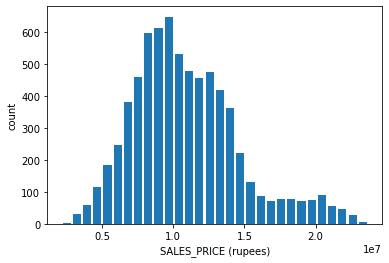

In [124]:
plt.hist(df.SALES_PRICE,bins=30,rwidth=0.8)
plt.xlabel('SALES_PRICE (rupees)')
plt.ylabel('count')
plt.show()

 The above histogram was a right skewed distribution(positive skew)

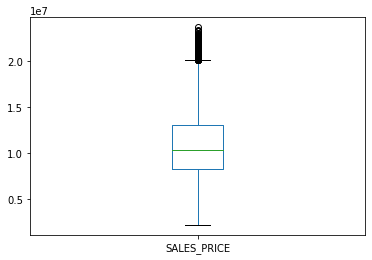

In [125]:
df.boxplot(column =['SALES_PRICE'], grid = False)
plt.show()

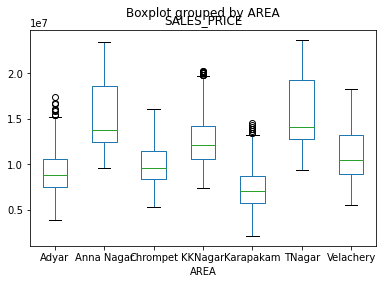

In [126]:

df.boxplot(by ='AREA', column =['SALES_PRICE'], grid = False)
plt.show()

# outlier detection using IQR

In [127]:
sorted(df['SALES_PRICE'])

[2156875,
 2476375,
 2640250,
 2797250,
 2939750,
 3000375,
 3001250,
 3013500,
 3029750,
 3081375,
 3090250,
 3093500,
 3102500,
 3120000,
 3172500,
 3189500,
 3210125,
 3219750,
 3226250,
 3247750,
 3250250,
 3267125,
 3276250,
 3331750,
 3339000,
 3404000,
 3452750,
 3454000,
 3524750,
 3540750,
 3561750,
 3572250,
 3574750,
 3577000,
 3602875,
 3608250,
 3643875,
 3717250,
 3741250,
 3767125,
 3781250,
 3785500,
 3793250,
 3807000,
 3815750,
 3833500,
 3844375,
 3854375,
 3863750,
 3867250,
 3869180,
 3874500,
 3891250,
 3906750,
 3914750,
 3916750,
 3924125,
 3928250,
 3936375,
 3944500,
 3947250,
 3948000,
 3950000,
 3953125,
 3968625,
 3974000,
 3975250,
 3990250,
 3992000,
 3999250,
 4004250,
 4027000,
 4049375,
 4076000,
 4100500,
 4146875,
 4155500,
 4158500,
 4168625,
 4182250,
 4188750,
 4190250,
 4198000,
 4204000,
 4224375,
 4242000,
 4243125,
 4256250,
 4268000,
 4288625,
 4294000,
 4295250,
 4310500,
 4315500,
 4321000,
 4342750,
 4343000,
 4345125,
 4353625,
 4356500,


In [128]:
q1,q3=np.percentile(df['SALES_PRICE'],[25,75])

In [129]:
print(q1 , q3)

8272100.0 12993900.0


In [130]:
IQR=q3-q1
IQR

4721800.0

In [131]:
lowervalue= (q1-(1.5*IQR))
uppervalue= (q3+(1.5*IQR))
print(lowervalue,uppervalue)

1189400.0 20076600.0


In [132]:
mini=df['SALES_PRICE'].min()
mini

2156875

In [133]:
lowervalue<mini

True

In [134]:
maxi=df['SALES_PRICE'].max()
maxi

23667340

In [135]:
uppervalue>maxi

False

In [136]:
outliers=df[(df.SALES_PRICE>uppervalue)|(df.SALES_PRICE<lowervalue)]
outliers

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,0,1995-12-22,Commercial,AllPub,Gravel,RH,4,4,2,3,21717770
19,Anna Nagar,1902,2012-02-07,168,2,1,5,Family,1,1970-07-13,Commercial,ELO,Paved,RL,4,4,4,4,21203240
47,Anna Nagar,1710,2009-12-11,15,1,1,4,NormalSale,1,1998-11-15,Commercial,AllPub,Gravel,RH,2,4,2,2,20215970
125,TNagar,1973,2007-01-29,63,2,1,5,Family,1,1972-02-07,Commercial,AllPub,Gravel,RM,2,2,4,3,23307000
168,TNagar,1926,2007-05-27,193,2,1,5,AdjLand,1,1990-05-31,Commercial,NoSewr,NoAccess,RM,4,4,3,3,22630540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000,TNagar,1901,2007-12-31,83,2,1,5,NormalSale,1,2003-01-01,Commercial,ELO,Paved,RM,4,2,2,3,22629400
7008,TNagar,1810,2014-06-06,109,2,1,5,AdjLand,1,2000-06-09,Commercial,NoSewr,NoAccess,RM,2,2,2,2,21556330
7024,Anna Nagar,1703,2007-04-16,164,1,1,4,AdjLand,1,2002-04-17,Commercial,AllPub,Paved,RL,2,3,3,3,20782250
7058,TNagar,1858,2009-02-27,36,2,1,5,NormalSale,1,1974-03-08,Commercial,ELO,NoAccess,RM,2,4,4,3,21185700


In [137]:
no_outliers=df[(df.SALES_PRICE<uppervalue)&(df.SALES_PRICE>lowervalue)]
no_outliers

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakam,1004,2011-04-05,131,1,1,3,AbNormal,1,1967-05-15,Commercial,AllPub,Paved,A,4,3,4,4,7600000
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,1,1992-02-09,Commercial,ELO,Gravel,RL,4,3,2,3,13159200
3,Velachery,1855,2010-03-13,14,3,2,5,Family,0,1988-03-18,Other,NoSewr,Paved,I,4,3,3,4,9630290
4,Karapakam,1226,2009-05-10,84,1,1,3,AbNormal,1,1979-10-13,Other,AllPub,Gravel,C,3,2,4,3,7406250
5,Chrompet,1220,2014-11-09,36,2,1,4,Partial,0,2009-09-12,Commercial,NoSeWa,NoAccess,RH,4,2,3,3,12394750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakam,598,2011-03-01,51,1,1,2,AdjLand,0,1962-01-15,Other,ELO,NoAccess,RM,3,2,2,2,5353000
7105,Velachery,1897,2004-08-04,52,3,2,5,Family,1,1995-04-11,Other,NoSeWa,NoAccess,RH,3,4,3,3,10818480
7106,Velachery,1614,2006-08-25,152,2,1,4,NormalSale,0,1978-09-01,House,NoSeWa,Gravel,I,4,4,2,3,8351410
7107,Karapakam,787,2009-03-08,40,1,1,2,Partial,1,1977-08-11,Commercial,ELO,Paved,RL,4,3,4,4,8507000


In [138]:
6881-7109

-228

# outlier detection using z-score method

In [139]:
data=df['SALES_PRICE']
outliers=[]
def detect_outliers(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if z_score > threshold:
            outliers.append(z_score)
    return outliers

In [140]:
outlierdetection=detect_outliers(data)
outlierdetection

[3.2937833812483186,
 3.1142719016095426,
 3.166971521308364,
 3.066216238528524,
 3.1445929577895484,
 3.389406428543113,
 3.0395201221999,
 3.097423627000156,
 3.190156806433929,
 3.0272653841078934,
 3.079415690081066,
 3.1535120081852246,
 3.1906875443331066,
 3.03175808042443,
 3.1732766875505916,
 3.0266364596973685,
 3.1359339689644687,
 3.0848106408262046,
 3.0689919977412217,
 3.114924709225531,
 3.2780178119532537,
 3.061389177335505,
 3.1290768353070963,
 3.0005029255418725,
 3.1113342673375954,
 3.1043869082373634,
 3.079511222902918,
 3.053377688747422,
 3.2957948778862014,
 3.0046877938768866,
 3.3205484935038356,
 3.139619943674256,
 3.1007354314910227,
 3.0703586478316036,
 3.040101280199499,
 3.1139693810070117,
 3.2158975945440336]

There are  outliers in 'SALES_PRICE' column

In [141]:
df['zscore']=(df.SALES_PRICE-df.SALES_PRICE.mean())/df.SALES_PRICE.std()
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,zscore
0,Karapakam,1004,2011-04-05,131,1,1,3,AbNormal,1,1967-05-15,Commercial,AllPub,Paved,A,4,3,4,4,7600000,-0.874305
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,0,1995-12-22,Commercial,AllPub,Gravel,RH,4,4,2,3,21717770,2.871849
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,1,1992-02-09,Commercial,ELO,Gravel,RL,4,3,2,3,13159200,0.600830
3,Velachery,1855,2010-03-13,14,3,2,5,Family,0,1988-03-18,Other,NoSewr,Paved,I,4,3,3,4,9630290,-0.335567
4,Karapakam,1226,2009-05-10,84,1,1,3,AbNormal,1,1979-10-13,Other,AllPub,Gravel,C,3,2,4,3,7406250,-0.925717


In [142]:
df[df['zscore']>3]

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,zscore
125,TNagar,1973,2007-01-29,63,2,1,5,Family,1,1972-02-07,Commercial,AllPub,Gravel,RM,2,2,4,3,23307000,3.293552
168,TNagar,1926,2007-05-27,193,2,1,5,AdjLand,1,1990-05-31,Commercial,NoSewr,NoAccess,RM,4,4,3,3,22630540,3.114053
572,Anna Nagar,1976,2008-09-01,82,2,1,5,AbNormal,1,1994-01-12,Commercial,NoSeWa,Gravel,RL,2,2,2,2,22829130,3.166749
601,Anna Nagar,1962,2007-09-09,84,2,1,5,Family,1,1977-09-16,Commercial,ELO,Paved,RM,5,2,3,3,22449450,3.066001
638,Anna Nagar,1958,2011-01-20,141,2,1,5,Family,1,1986-01-26,Commercial,AllPub,Paved,RM,2,4,2,3,22744800,3.144372
837,TNagar,1925,2007-05-25,177,2,1,5,NormalSale,1,2000-05-26,Commercial,AllPub,Gravel,RM,3,4,3,3,23667340,3.389168
850,Anna Nagar,1793,2014-10-19,157,1,1,4,AdjLand,1,2009-10-20,Commercial,NoSeWa,Gravel,RM,2,2,2,2,22348850,3.039306
863,Anna Nagar,1996,2008-08-23,46,2,1,5,NormalSale,0,2003-08-25,Commercial,NoSewr,Paved,RM,3,3,4,3,22567050,3.097206
1099,Anna Nagar,1969,2013-04-20,76,2,1,5,NormalSale,1,1993-04-25,Commercial,NoSeWa,Paved,RM,4,4,2,3,22916500,3.189932
1909,TNagar,1955,2012-01-14,137,2,1,5,Partial,1,1976-01-23,Commercial,AllPub,Gravel,RL,4,3,2,3,22302670,3.027052


In [143]:
df[df['zscore']<-3]

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,zscore


In [144]:
7072-7109

-37

# Alternate method to find z-score

In [145]:
m=df.SALES_PRICE.mean()
m

10894909.63918976

In [146]:
s=df.SALES_PRICE.std()
s

3768603.4570030593

In [147]:
upperlimit=m+(3*s)
upperlimit

22200720.010198936

In [148]:
lowerlimit=m-(3*s)
lowerlimit

-410900.7318194192

In [149]:
outliers=df[(df.SALES_PRICE>upperlimit)|(df.SALES_PRICE<lowerlimit)]
outliers

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,zscore
125,TNagar,1973,2007-01-29,63,2,1,5,Family,1,1972-02-07,Commercial,AllPub,Gravel,RM,2,2,4,3,23307000,3.293552
168,TNagar,1926,2007-05-27,193,2,1,5,AdjLand,1,1990-05-31,Commercial,NoSewr,NoAccess,RM,4,4,3,3,22630540,3.114053
572,Anna Nagar,1976,2008-09-01,82,2,1,5,AbNormal,1,1994-01-12,Commercial,NoSeWa,Gravel,RL,2,2,2,2,22829130,3.166749
601,Anna Nagar,1962,2007-09-09,84,2,1,5,Family,1,1977-09-16,Commercial,ELO,Paved,RM,5,2,3,3,22449450,3.066001
638,Anna Nagar,1958,2011-01-20,141,2,1,5,Family,1,1986-01-26,Commercial,AllPub,Paved,RM,2,4,2,3,22744800,3.144372
837,TNagar,1925,2007-05-25,177,2,1,5,NormalSale,1,2000-05-26,Commercial,AllPub,Gravel,RM,3,4,3,3,23667340,3.389168
850,Anna Nagar,1793,2014-10-19,157,1,1,4,AdjLand,1,2009-10-20,Commercial,NoSeWa,Gravel,RM,2,2,2,2,22348850,3.039306
863,Anna Nagar,1996,2008-08-23,46,2,1,5,NormalSale,0,2003-08-25,Commercial,NoSewr,Paved,RM,3,3,4,3,22567050,3.097206
1099,Anna Nagar,1969,2013-04-20,76,2,1,5,NormalSale,1,1993-04-25,Commercial,NoSeWa,Paved,RM,4,4,2,3,22916500,3.189932
1909,TNagar,1955,2012-01-14,137,2,1,5,Partial,1,1976-01-23,Commercial,AllPub,Gravel,RL,4,3,2,3,22302670,3.027052


#Observation from the outliers of SALES_PRICE:

    #area= tnagar,annanagar
    #buildtype=commercial
    #mzzone= RM,RL,RH
    
 *This shows that Tnagar and annanagar are the places in chennai were sqft are sold at good price.
 
 *And the commercial building price at those areas are way higher than house and other.
 
 *These buildings are mostly located at RH,RL,RM.
 
 *I dont remove these outliers because it is normal to have these outliers and it depend upon the problem.

In [150]:
no_outliers=df[(df.SALES_PRICE<upperlimit)&(df.SALES_PRICE>lowerlimit)]
no_outliers

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,zscore
0,Karapakam,1004,2011-04-05,131,1,1,3,AbNormal,1,1967-05-15,Commercial,AllPub,Paved,A,4,3,4,4,7600000,-0.874305
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,0,1995-12-22,Commercial,AllPub,Gravel,RH,4,4,2,3,21717770,2.871849
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,1,1992-02-09,Commercial,ELO,Gravel,RL,4,3,2,3,13159200,0.600830
3,Velachery,1855,2010-03-13,14,3,2,5,Family,0,1988-03-18,Other,NoSewr,Paved,I,4,3,3,4,9630290,-0.335567
4,Karapakam,1226,2009-05-10,84,1,1,3,AbNormal,1,1979-10-13,Other,AllPub,Gravel,C,3,2,4,3,7406250,-0.925717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakam,598,2011-03-01,51,1,1,2,AdjLand,0,1962-01-15,Other,ELO,NoAccess,RM,3,2,2,2,5353000,-1.470547
7105,Velachery,1897,2004-08-04,52,3,2,5,Family,1,1995-04-11,Other,NoSeWa,NoAccess,RH,3,4,3,3,10818480,-0.020281
7106,Velachery,1614,2006-08-25,152,2,1,4,NormalSale,0,1978-09-01,House,NoSeWa,Gravel,I,4,4,2,3,8351410,-0.674918
7107,Karapakam,787,2009-03-08,40,1,1,2,Partial,1,1977-08-11,Commercial,ELO,Paved,RL,4,3,4,4,8507000,-0.633633


In [151]:
7109-7072

37

In [152]:
df.shape[0]-no_outliers.shape[0]

37

In [153]:
df.drop('zscore',axis=1,inplace=True)
df

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakam,1004,2011-04-05,131,1,1,3,AbNormal,1,1967-05-15,Commercial,AllPub,Paved,A,4,3,4,4,7600000
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,0,1995-12-22,Commercial,AllPub,Gravel,RH,4,4,2,3,21717770
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,1,1992-02-09,Commercial,ELO,Gravel,RL,4,3,2,3,13159200
3,Velachery,1855,2010-03-13,14,3,2,5,Family,0,1988-03-18,Other,NoSewr,Paved,I,4,3,3,4,9630290
4,Karapakam,1226,2009-05-10,84,1,1,3,AbNormal,1,1979-10-13,Other,AllPub,Gravel,C,3,2,4,3,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakam,598,2011-03-01,51,1,1,2,AdjLand,0,1962-01-15,Other,ELO,NoAccess,RM,3,2,2,2,5353000
7105,Velachery,1897,2004-08-04,52,3,2,5,Family,1,1995-04-11,Other,NoSeWa,NoAccess,RH,3,4,3,3,10818480
7106,Velachery,1614,2006-08-25,152,2,1,4,NormalSale,0,1978-09-01,House,NoSeWa,Gravel,I,4,4,2,3,8351410
7107,Karapakam,787,2009-03-08,40,1,1,2,Partial,1,1977-08-11,Commercial,ELO,Paved,RL,4,3,4,4,8507000


# Age of building in days (new feauture)

In [154]:
timea=pd.Timestamp(df.DATE_SALE[0])
timeb=pd.Timestamp(df.DATE_BUILD[0])
timea-timeb

Timedelta('16031 days 00:00:00')

In [155]:
df['age_of_building']=(df['DATE_SALE']-df['DATE_BUILD'])
df['age_of_building']

0      16031 days
1       4015 days
2       7358 days
3       8030 days
4      10802 days
          ...    
7104   17942 days
7105    3403 days
7106   10220 days
7107   11532 days
7108   16060 days
Name: age_of_building, Length: 7109, dtype: timedelta64[ns]

In [156]:
df['age_of_building']=df['age_of_building'].astype(str).str.replace('days','')
df['age_of_building']

0       16031 
1        4015 
2        7358 
3        8030 
4       10802 
         ...  
7104    17942 
7105     3403 
7106    10220 
7107    11532 
7108    16060 
Name: age_of_building, Length: 7109, dtype: object

In [157]:
df['age_of_building'].astype(int)

0       16031
1        4015
2        7358
3        8030
4       10802
        ...  
7104    17942
7105     3403
7106    10220
7107    11532
7108    16060
Name: age_of_building, Length: 7109, dtype: int32

In [158]:
df.dtypes

AREA                       object
INT_SQFT                    int64
DATE_SALE          datetime64[ns]
DIST_MAINROAD               int64
N_BEDROOM                   int32
N_BATHROOM                  int32
N_ROOM                      int64
SALE_COND                  object
PARK_FACIL                   int8
DATE_BUILD         datetime64[ns]
BUILDTYPE                  object
UTILITY_AVAIL              object
STREET                     object
MZZONE                     object
QS_ROOMS                    int32
QS_BATHROOM                 int32
QS_BEDROOM                  int32
QS_OVERALL                  int32
SALES_PRICE                 int64
age_of_building            object
dtype: object

In [159]:
df.to_csv('cleaneddata')

# EDA

# distribution of the feauture
       continious feauture

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='INT_SQFT', ylabel='Density'>

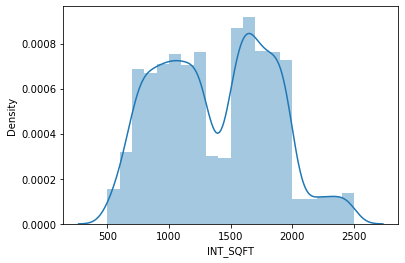

In [160]:
sns.distplot(df.INT_SQFT,bins=20)

observation:
    intsqft column was a bimodal distribution

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DATE_SALE', ylabel='Density'>

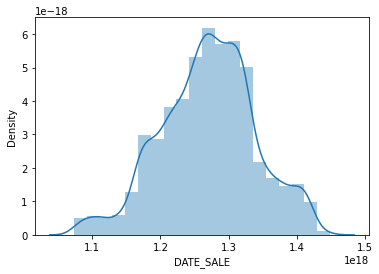

In [161]:
sns.distplot(df.DATE_SALE,bins=20)

observation:
    datesale column was a unimodal distribution

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DIST_MAINROAD', ylabel='Density'>

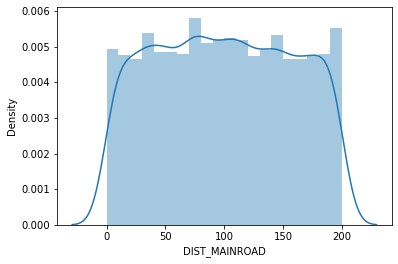

In [162]:
sns.distplot(df.DIST_MAINROAD,bins=20)

observation:
    dist mainroad column was a uniform distribution

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='N_BEDROOM', ylabel='Density'>

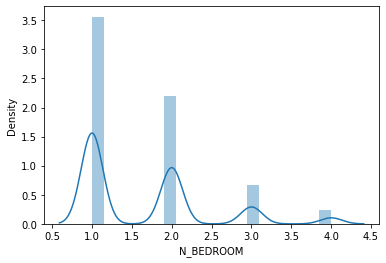

In [163]:
sns.distplot(df.N_BEDROOM,bins=20)

observation:
    n bedroom was a multimodal distribution

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='N_BATHROOM', ylabel='Density'>

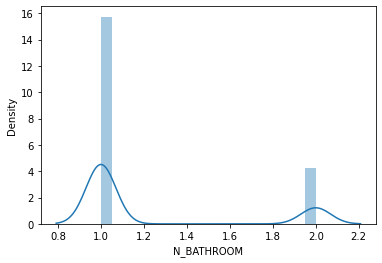

In [164]:
sns.distplot(df.N_BATHROOM,bins=20)

observation:
   nbathroom column was a bimodal distribution

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='N_ROOM', ylabel='Density'>

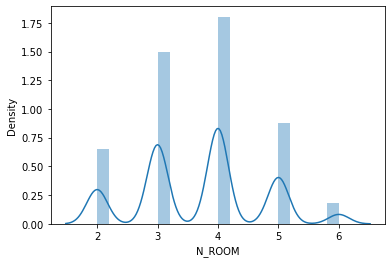

In [165]:
sns.distplot(df.N_ROOM,bins=20)

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DATE_BUILD', ylabel='Density'>

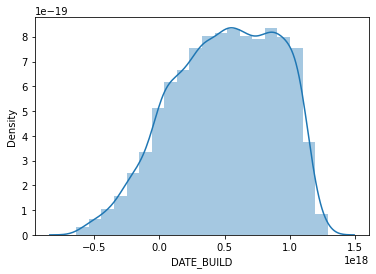

In [166]:
sns.distplot(df.DATE_BUILD,bins=20)

observation:
    datebuild was a unimodal distribution

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='QS_ROOMS', ylabel='Density'>

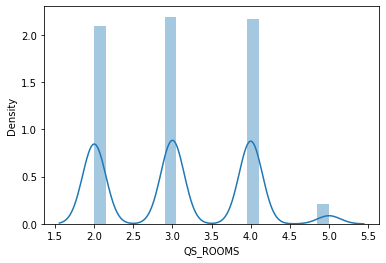

In [167]:
sns.distplot(df.QS_ROOMS,bins=20)

observation:
    qsrooms was a multimodal distribution

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='QS_BATHROOM', ylabel='Density'>

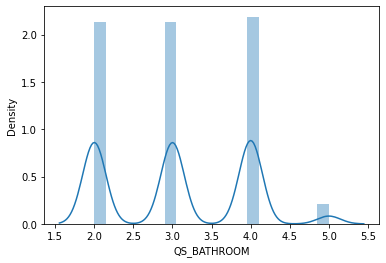

In [168]:
sns.distplot(df.QS_BATHROOM,bins=20)

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='QS_OVERALL', ylabel='Density'>

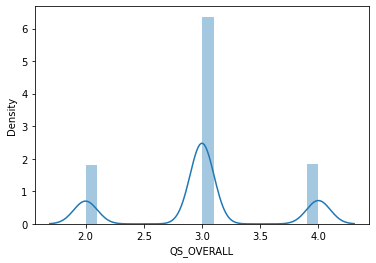

In [169]:
sns.distplot(df.QS_OVERALL,bins=20)

observation:
    qsoverall column was a multimodal distribution

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALES_PRICE', ylabel='Density'>

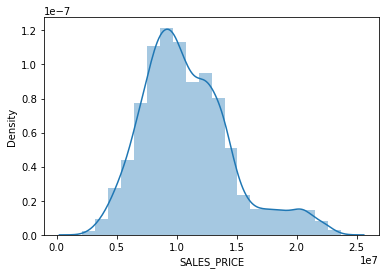

In [170]:
sns.distplot(df.SALES_PRICE,bins=20)

observation:
    salesprice column was a right skewed distribution

categorical features 

In [171]:
df_frequency_map=df.AREA.value_counts().to_dict()
df.area=df.AREA.map(df_frequency_map)
df.area.head()

C:\Users\subha\AppData\Local\Temp/ipykernel_3352/242385131.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.area=df.AREA.map(df_frequency_map)


0    1366
1     788
2     774
3     981
4    1366
Name: AREA, dtype: int64

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AREA', ylabel='Density'>

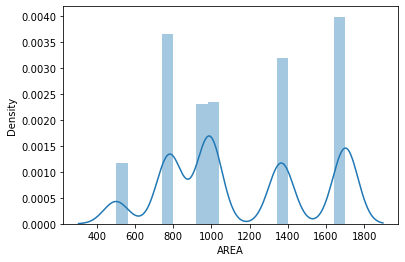

In [172]:
sns.distplot(df.area,bins=20)

In [173]:
df_frequency_map1=df.SALE_COND.value_counts().to_dict()
df.salecondition=df.SALE_COND.map(df_frequency_map1)
df.salecondition.head()

C:\Users\subha\AppData\Local\Temp/ipykernel_3352/4268222491.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.salecondition=df.SALE_COND.map(df_frequency_map1)


0    1411
1    1411
2    1411
3    1403
4    1411
Name: SALE_COND, dtype: int64

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALE_COND', ylabel='Density'>

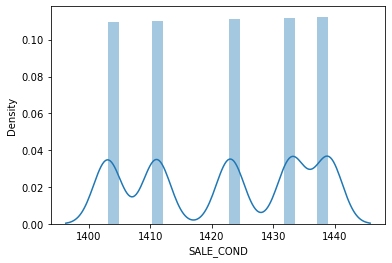

In [174]:
sns.distplot(df.salecondition,bins=20)

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PARK_FACIL', ylabel='Density'>

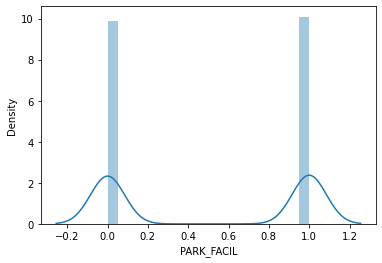

In [175]:
sns.distplot(df.PARK_FACIL,bins=20)

In [176]:
df_frequency_map2=df.MZZONE.value_counts().to_dict()
df.mzzone=df.MZZONE.map(df_frequency_map2)
df.mzzone.head()

C:\Users\subha\AppData\Local\Temp/ipykernel_3352/3893573037.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.mzzone=df.MZZONE.map(df_frequency_map2)


0     537
1    1822
2    1858
3     525
4     550
Name: MZZONE, dtype: int64

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MZZONE', ylabel='Density'>

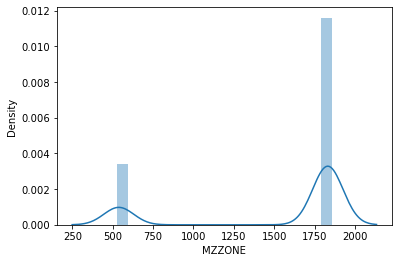

In [177]:
sns.distplot(df.mzzone,bins=20)

In [178]:
df_frequency_map2=df.UTILITY_AVAIL.value_counts().to_dict()
df.utilityavail=df.UTILITY_AVAIL.map(df_frequency_map2)
df.utilityavail.head()

C:\Users\subha\AppData\Local\Temp/ipykernel_3352/2868812168.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.utilityavail=df.UTILITY_AVAIL.map(df_frequency_map2)


0    1887
1    1887
2    1522
3    1829
4    1887
Name: UTILITY_AVAIL, dtype: int64

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='UTILITY_AVAIL', ylabel='Density'>

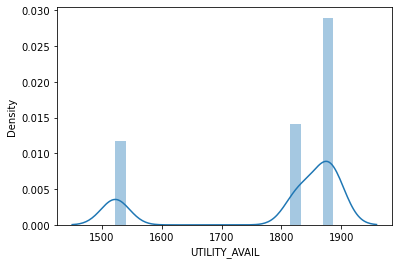

In [179]:
sns.distplot(df.utilityavail,bins=20)

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age_of_building', ylabel='Density'>

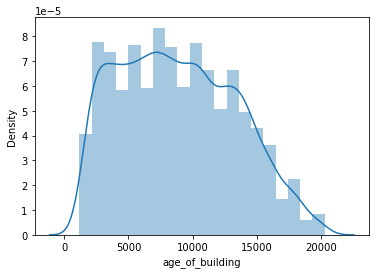

In [180]:
sns.distplot(df.age_of_building,bins=20)

# feauture vs target

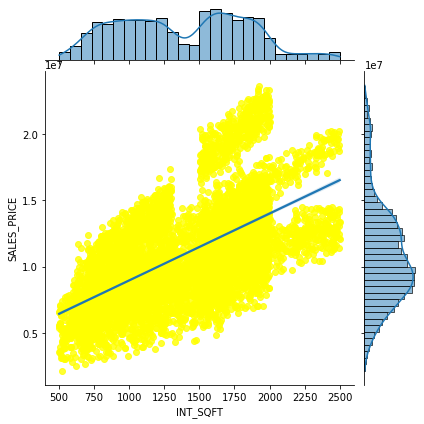

In [181]:
sns.jointplot(x='INT_SQFT',y='SALES_PRICE',data=df,kind='reg',scatter_kws={'color':'yellow'})

continious feautures vs target

Text(0.5, 1.0, 'QS_BEDROOM vs sales_price')

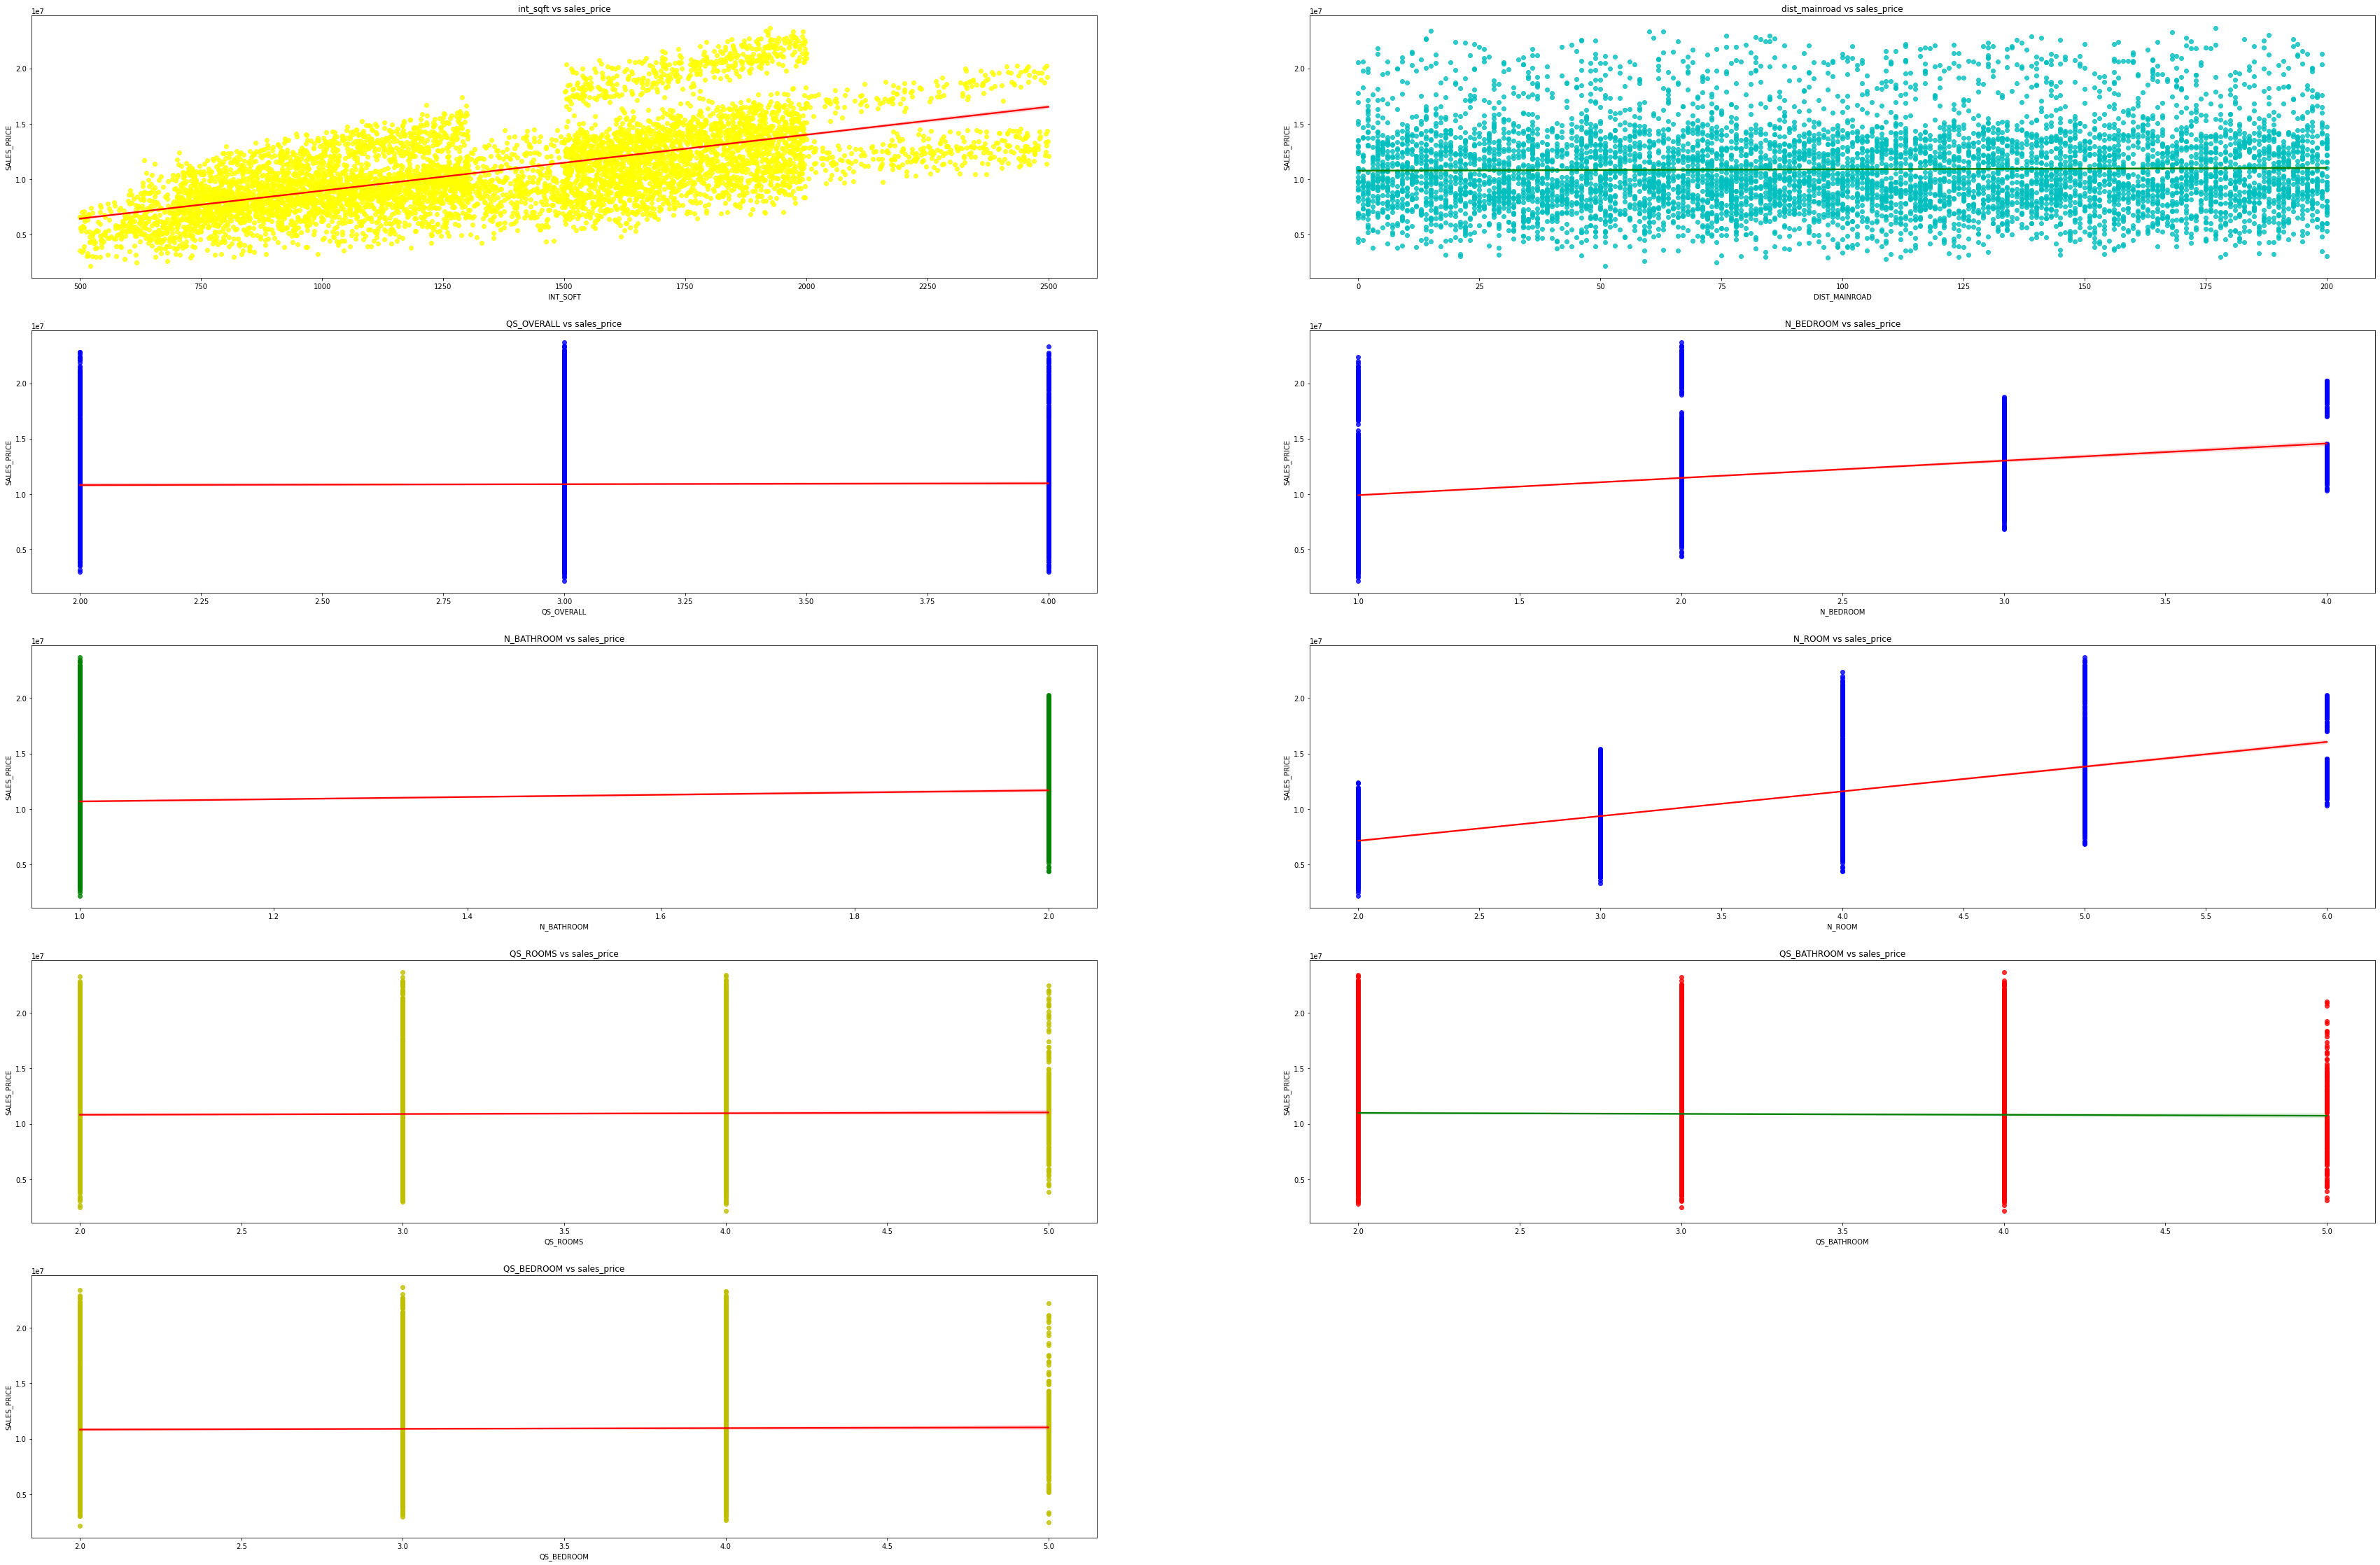

In [182]:
plt.figure(figsize=(60,40))
plt.subplot(521)
sns.regplot(x=df['INT_SQFT'],y=df['SALES_PRICE'],scatter_kws={'color':'yellow'},line_kws={'color':'red'})
plt.title('int_sqft vs sales_price')

plt.subplot(522)
sns.regplot(x=df['DIST_MAINROAD'],y=df['SALES_PRICE'],scatter_kws={'color':'c'},line_kws={'color':'g'})
plt.title('dist_mainroad vs sales_price')
#no linear relation ship

plt.subplot(523)
sns.regplot(x=df['QS_OVERALL'],y=df['SALES_PRICE'],scatter_kws={'color':'b'},line_kws={'color':'r'})
plt.title('QS_OVERALL vs sales_price')
#no linear relation ship

plt.subplot(524)
sns.regplot(x=df['N_BEDROOM'],y=df['SALES_PRICE'],scatter_kws={'color':'b'},line_kws={'color':'r'})
plt.title('N_BEDROOM vs sales_price')

plt.subplot(525)
sns.regplot(x=df['N_BATHROOM'],y=df['SALES_PRICE'],scatter_kws={'color':'g'},line_kws={'color':'r'})
plt.title('N_BATHROOM vs sales_price')

plt.subplot(526)
sns.regplot(x=df['N_ROOM'],y=df['SALES_PRICE'],scatter_kws={'color':'b'},line_kws={'color':'r'})
plt.title('N_ROOM vs sales_price')

plt.subplot(527)
sns.regplot(x=df['QS_ROOMS'],y=df['SALES_PRICE'],scatter_kws={'color':'y'},line_kws={'color':'r'})
plt.title('QS_ROOMS vs sales_price')
#no linear relation ship

plt.subplot(528)
sns.regplot(x=df['QS_BATHROOM'],y=df['SALES_PRICE'],scatter_kws={'color':'r'},line_kws={'color':'g'})
plt.title('QS_BATHROOM vs sales_price')
#no linear relation ship

plt.subplot(529)
sns.regplot(x=df['QS_BEDROOM'],y=df['SALES_PRICE'],scatter_kws={'color':'y'},line_kws={'color':'r'})
plt.title('QS_BEDROOM vs sales_price')
#no linear relation ship

Text(0.5, 1.0, 'age_of_building vs sales_price')

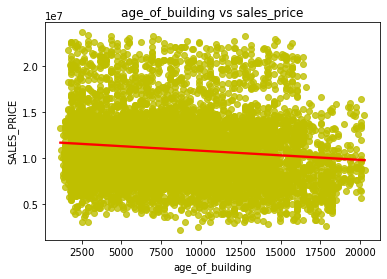

In [183]:
sns.regplot(x=df['age_of_building'].astype(float),y=df['SALES_PRICE'],scatter_kws={'color':'y'},line_kws={'color':'r'})
plt.title('age_of_building vs sales_price')

observation:
    
if the age of the building increases the sales price of the building decreases.

observation:

salesprice vs intsqft as a +linearrelationship

#salesprice vs distmainroad as no linearrelationship

#salesprice vs qsoverall as no linearrelationship

salesprice vs nbedroom as a + linearrelationship

salesprice vs nroom as a +linearrelationship

salesprice vs qsbathroom as a +linearrelationship

#salesprice vs qsrooms as no linearrelationship

salesprice vs nbathroom as a -linearrelationship

#salesprice vs qsbedroom as no linearrelationship

 so we can take the +&- linearrelationship as a feautures

categorical features vs target

Text(0.5, 1.0, 'STREET vs sales price')

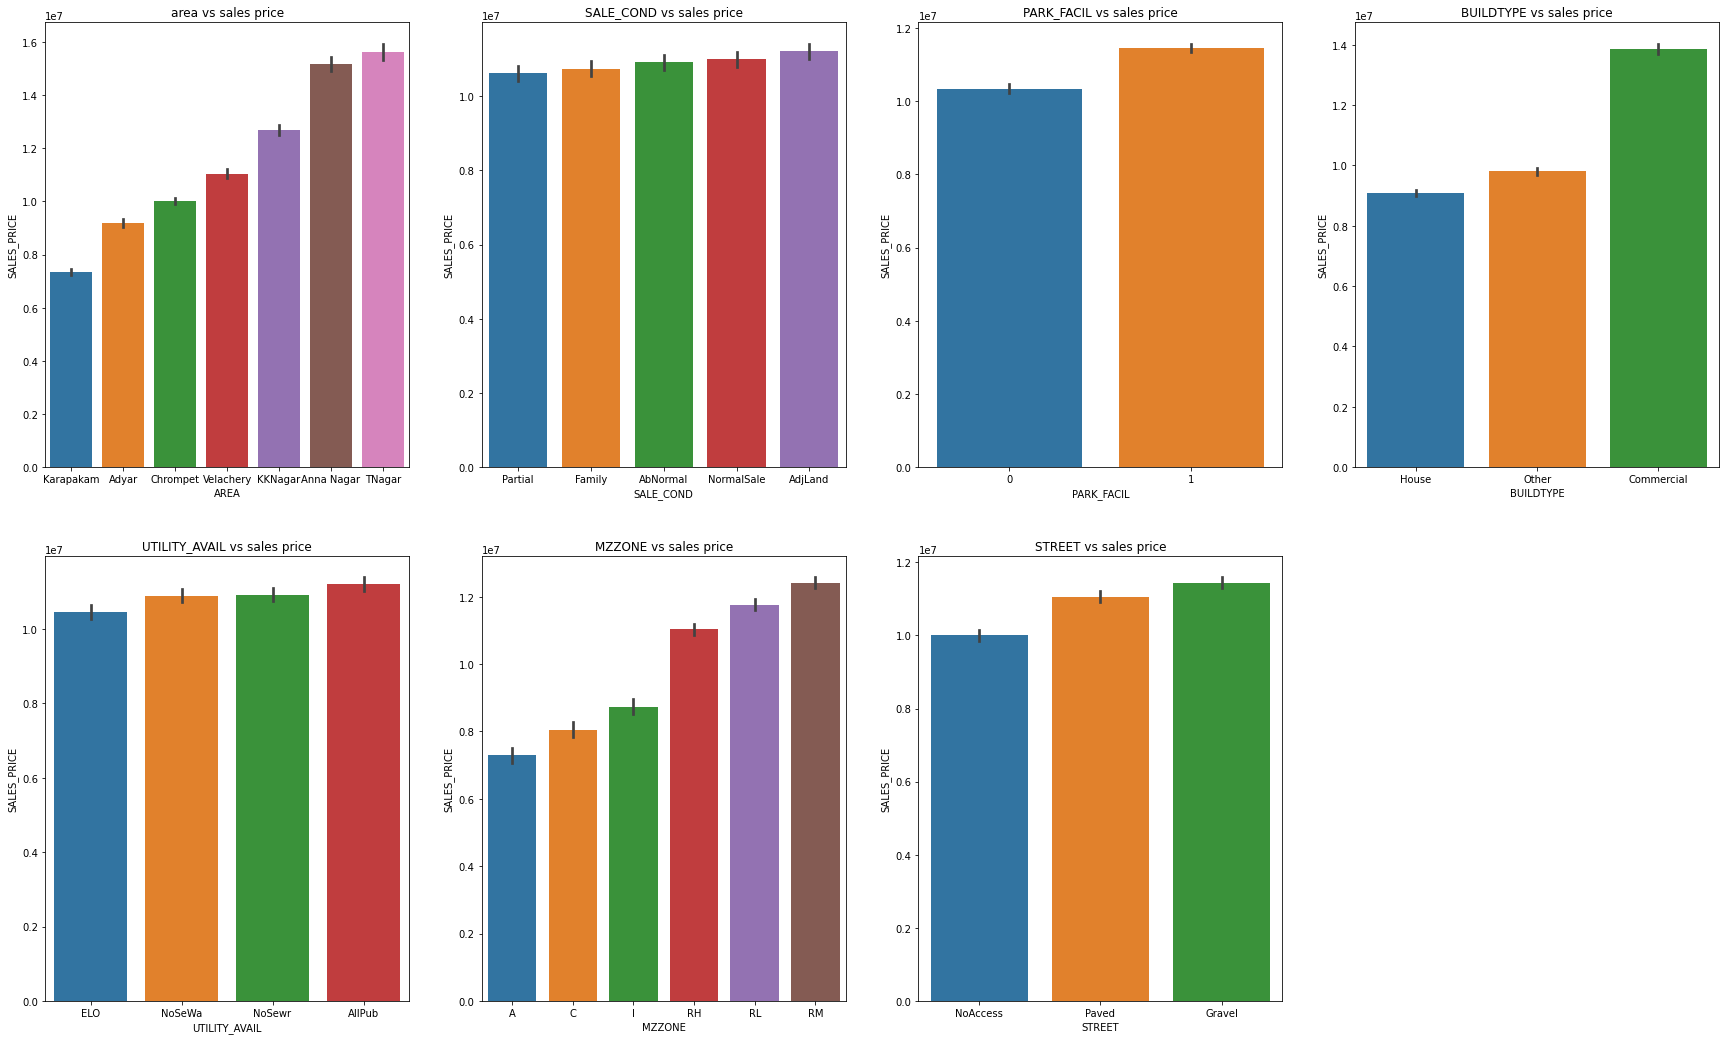

In [184]:
plt.figure(figsize=(30,18))
plt.subplot(241)
sns.barplot(x=df.AREA,y=df.SALES_PRICE,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title('area vs sales price')

plt.subplot(242)
sns.barplot(x=df.SALE_COND,y=df.SALES_PRICE,order=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.title('SALE_COND vs sales price')

plt.subplot(243)
sns.barplot(x=df.PARK_FACIL,y=df.SALES_PRICE,order=df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.title('PARK_FACIL vs sales price')

plt.subplot(244)
sns.barplot(x=df.BUILDTYPE,y=df.SALES_PRICE,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title('BUILDTYPE vs sales price')

plt.subplot(245)
sns.barplot(x=df.UTILITY_AVAIL,y=df.SALES_PRICE,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title('UTILITY_AVAIL vs sales price')

plt.subplot(246)
sns.barplot(x=df.MZZONE,y=df.SALES_PRICE,order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title('MZZONE vs sales price')

plt.subplot(247)
sns.barplot(x=df.STREET,y=df.SALES_PRICE,order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title('STREET vs sales price')

observation:

salesprice vs area as a +linearrelationship

salesprice vs salecondition as a +linearrelationship

salesprice vs parkfacility as a +linearrelationship

salesprice vs buildtype as a linearrelationship

salesprice vs utility available as a +linearrelationship

salesprice vs mzzone as a +linearrelationship

salesprice vs street as a +linearrelationship

 so we can take these feautures

!pip install sweetviz

import sweetviz as sv
report=sv.analyze(df)
report.show_html('./report.html')

# encoding the categorical data using OHE and label encoding

In [185]:
#mapping in sequence to get an order in data (label encoding)
area={'TNagar':0,'Adyar':1,
      'Anna Nagar':2,'Velachery':3,
      'KKNagar':4,'Karapakam':5,
      'Chrompet':6}
df['AREA']=df['AREA'].map(area)

buildtype={'House':0,'Other':1,'Commercial':3}
df['BUILDTYPE']=df['BUILDTYPE'].map(buildtype)

street={'NoAccess':0,'Paved':1,'Gravel':2}
df['STREET']=df['STREET'].map(street)

salecondition={'AbNormal':2, 'Family':1, 'Partial':0, 'AdjLand':4, 'NormalSale':3}
df['SALE_COND']=df['SALE_COND'].map(salecondition)

In [186]:
#one hot encoding using dummies
df=pd.get_dummies(df,columns=['MZZONE','UTILITY_AVAIL'])
df

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM,UTILITY_AVAIL_AllPub,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr
0,5,1004,2011-04-05,131,1,1,3,2,1,1967-05-15,...,1,0,0,0,0,0,1,0,0,0
1,2,1986,2006-12-19,26,2,1,5,2,0,1995-12-22,...,0,0,0,1,0,0,1,0,0,0
2,1,909,2012-04-02,70,1,1,3,2,1,1992-02-09,...,0,0,0,0,1,0,0,1,0,0
3,3,1855,2010-03-13,14,3,2,5,1,0,1988-03-18,...,0,0,1,0,0,0,0,0,0,1
4,5,1226,2009-05-10,84,1,1,3,2,1,1979-10-13,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,5,598,2011-03-01,51,1,1,2,4,0,1962-01-15,...,0,0,0,0,0,1,0,1,0,0
7105,3,1897,2004-08-04,52,3,2,5,1,1,1995-04-11,...,0,0,0,1,0,0,0,0,1,0
7106,3,1614,2006-08-25,152,2,1,4,3,0,1978-09-01,...,0,0,1,0,0,0,0,0,1,0
7107,5,787,2009-03-08,40,1,1,2,0,1,1977-08-11,...,0,0,0,0,1,0,0,1,0,0


In [187]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'STREET', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'age_of_building', 'MZZONE_A', 'MZZONE_C',
       'MZZONE_I', 'MZZONE_RH', 'MZZONE_RL', 'MZZONE_RM',
       'UTILITY_AVAIL_AllPub', 'UTILITY_AVAIL_ELO', 'UTILITY_AVAIL_NoSeWa',
       'UTILITY_AVAIL_NoSewr'],
      dtype='object')

In [188]:
df.to_csv('cleaneden_data')

In [189]:
pd.set_option('display.max_columns', 28)
df

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,age_of_building,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM,UTILITY_AVAIL_AllPub,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr
0,5,1004,2011-04-05,131,1,1,3,2,1,1967-05-15,3,1,4,3,4,4,7600000,16031,1,0,0,0,0,0,1,0,0,0
1,2,1986,2006-12-19,26,2,1,5,2,0,1995-12-22,3,2,4,4,2,3,21717770,4015,0,0,0,1,0,0,1,0,0,0
2,1,909,2012-04-02,70,1,1,3,2,1,1992-02-09,3,2,4,3,2,3,13159200,7358,0,0,0,0,1,0,0,1,0,0
3,3,1855,2010-03-13,14,3,2,5,1,0,1988-03-18,1,1,4,3,3,4,9630290,8030,0,0,1,0,0,0,0,0,0,1
4,5,1226,2009-05-10,84,1,1,3,2,1,1979-10-13,1,2,3,2,4,3,7406250,10802,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,5,598,2011-03-01,51,1,1,2,4,0,1962-01-15,1,0,3,2,2,2,5353000,17942,0,0,0,0,0,1,0,1,0,0
7105,3,1897,2004-08-04,52,3,2,5,1,1,1995-04-11,1,0,3,4,3,3,10818480,3403,0,0,0,1,0,0,0,0,1,0
7106,3,1614,2006-08-25,152,2,1,4,3,0,1978-09-01,0,2,4,4,2,3,8351410,10220,0,0,1,0,0,0,0,0,1,0
7107,5,787,2009-03-08,40,1,1,2,0,1,1977-08-11,3,1,4,3,4,4,8507000,11532,0,0,0,0,1,0,0,1,0,0
